# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create the dataset

In [2]:
X = 6*np.random.rand(100,1) - 3
y = 0.5 * X**2 + 1.5*X + 2 + np.random.randn(100,1)

In [3]:
X[:5]

array([[ 2.72120228],
       [-2.68567229],
       [ 2.44381558],
       [ 1.67144567],
       [ 1.07411745]])

In [4]:
y[:5]

array([[9.85130701],
       [0.32998735],
       [7.59852151],
       [6.57228591],
       [4.13884945]])

# Visualize the data

Text(0, 0.5, 'y')

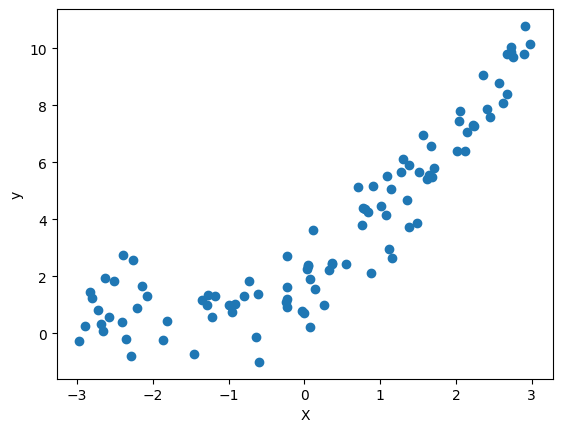

In [6]:
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel('y')

# Splitting the data

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1011)

# Scale the data

In [12]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [18]:
scaled_X_train[:5]

array([[ 0.43112921],
       [-1.49360904],
       [ 1.50592161],
       [-0.18627049],
       [-0.02466152]])

In [19]:
scaled_X_test[:5]

array([[-0.61041062],
       [-0.40560031],
       [ 0.09849863],
       [-0.46786675],
       [-1.6610329 ]])

# Crete a simple linear regression model to check performance

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
regressor = LinearRegression()

In [20]:
regressor.fit(scaled_X_train,y_train)

LinearRegression()

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [22]:
y_pred_linear = regressor.predict(scaled_X_test)

In [23]:
MAE = mean_absolute_error(y_test, y_pred_linear)
MSE = mean_squared_error(y_test, y_pred_linear)
RMSE = np.sqrt(MSE)
r2 = r2_score(y_test, y_pred_linear)

In [24]:
error_linear = pd.DataFrame({"MAE":MAE, "MSE":MSE, "RMSE":RMSE, "R2": r2}, index=['errors'])
error_linear

,MAE,MSE,RMSE,R2
errors,1.438424,3.143243,1.772919,0.721801


# Visualize the model

Text(0, 0.5, 'y data')

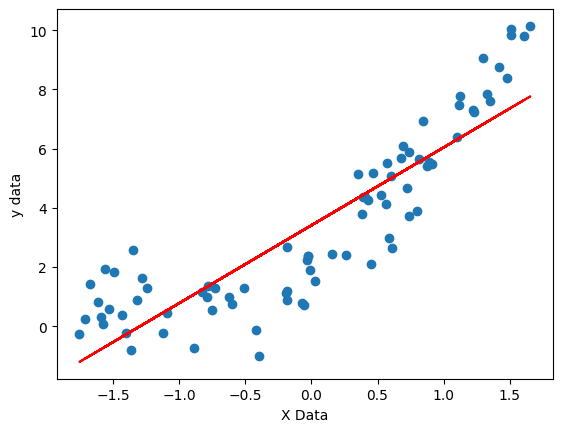

In [25]:
plt.plot(scaled_X_train, regressor.predict(scaled_X_train), color='r')
plt.scatter(scaled_X_train, y_train)
plt.xlabel('X Data')
plt.ylabel('y data')

In [27]:
residuals =  y_test-y_pred_linear
residuals[:5]

array([[-0.8390264 ],
       [-0.96759767],
       [-2.67767375],
       [-0.35281179],
       [ 2.2113371 ]])

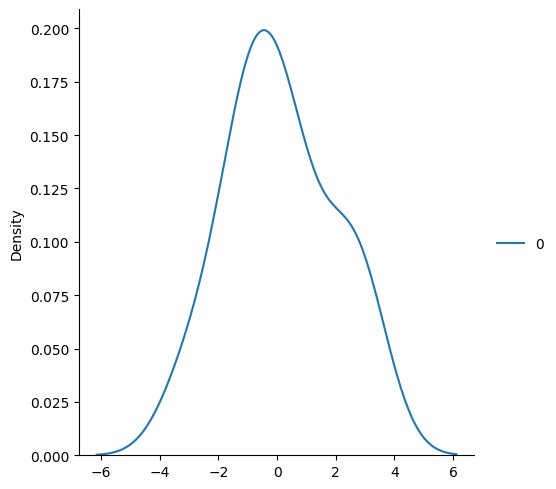

In [28]:
sns.displot(residuals, kind='kde')

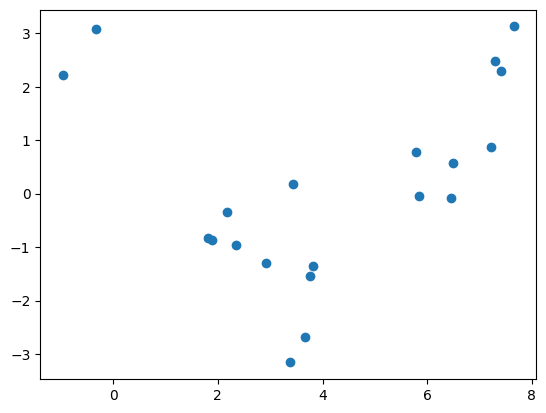

In [29]:
plt.scatter(y_pred_linear, residuals)

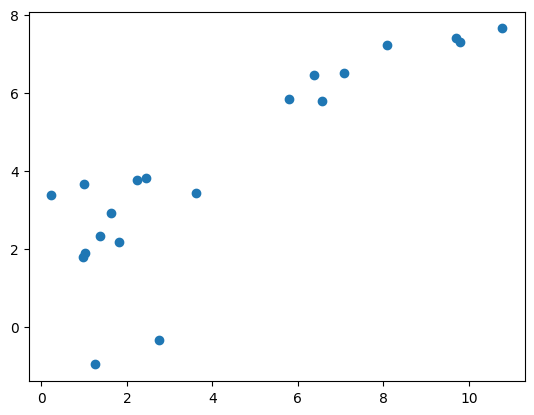

In [30]:
plt.scatter(y_test, y_pred_linear)

# Create a model using polynomial Regression

In [34]:
from sklearn.preprocessing import PolynomialFeatures

In [35]:
poly_features = PolynomialFeatures(degree=2, include_bias=True)

In [36]:
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [37]:
X_train_poly[:5]

array([[ 1.00000000e+00,  8.44581607e-01,  7.13318091e-01],
       [ 1.00000000e+00, -2.51607073e+00,  6.33061191e+00],
       [ 1.00000000e+00,  2.72120228e+00,  7.40494187e+00],
       [ 1.00000000e+00, -2.33417310e-01,  5.44836405e-02],
       [ 1.00000000e+00,  4.87569369e-02,  2.37723889e-03]])

In [38]:
X_test_poly[:5]

array([[ 1.        , -0.97397906,  0.94863521],
       [ 1.        , -0.61637393,  0.37991682],
       [ 1.        ,  0.26379835,  0.06958957],
       [ 1.        , -0.72509306,  0.52575995],
       [ 1.        , -2.80839796,  7.88709913]])

# Create the model

In [39]:
regressor_poly = LinearRegression()
regressor_poly.fit(X_train_poly, y_train)

LinearRegression()

In [40]:
y_pred_poly = regressor_poly.predict(X_test_poly)

In [42]:
MAE_p = mean_absolute_error(y_test, y_pred_poly)
MSE_p = mean_squared_error(y_test, y_pred_poly)
RMSE_p = np.sqrt(MSE)
r2_p = r2_score(y_test, y_pred_poly)

In [43]:
error_poly = pd.DataFrame({"MAE":MAE_p, "MSE":MSE_p, "RMSE":RMSE_p, "R2": r2_p}, index=['errors'])
error_poly

,MAE,MSE,RMSE,R2
errors,0.670155,0.820982,1.772919,0.927337


# Viusalize

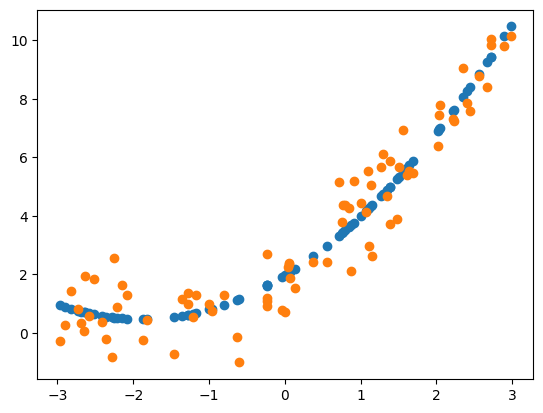

In [53]:
plt.scatter(X_train, regressor_poly.predict(X_train_poly))
plt.scatter(X_train, y_train)

In [45]:
residuals_p =  y_test-y_pred_poly
residuals_p[:5]

array([[ 0.14205843],
       [ 0.22203647],
       [-1.43380143],
       [ 0.78482086],
       [ 0.42825697]])

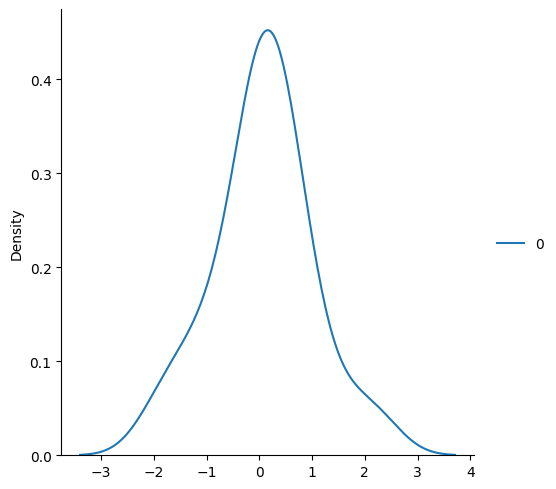

In [46]:
sns.displot(residuals_p, kind='kde')

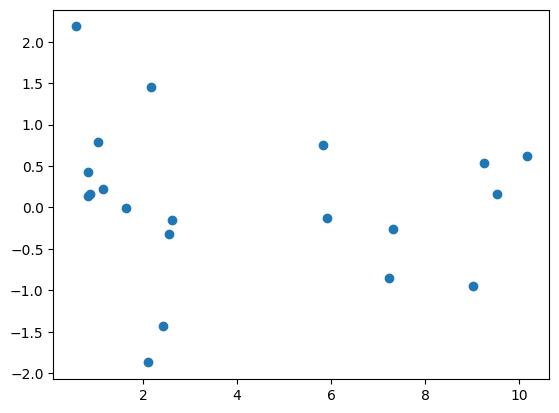

In [47]:
plt.scatter(y_pred_poly, residuals_p)

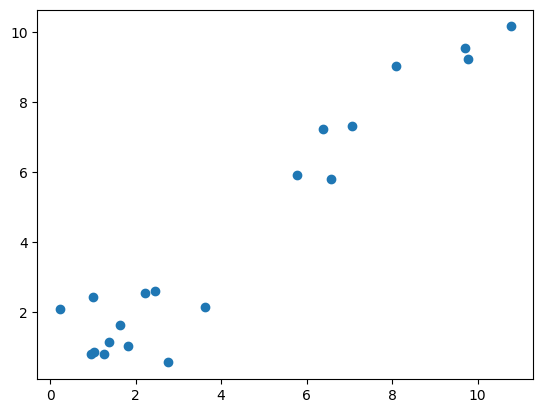

In [48]:
plt.scatter(y_test, y_pred_poly)

In [49]:
regressor_poly.coef_

array([[0.        , 1.59479635, 0.42136896]])

In [50]:
regressor_poly.intercept_

array([1.97570526])

# Pipeline for Polynomial regression

In [54]:
from sklearn.pipeline import Pipeline


In [55]:
def poly_regression(degree):
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)
    
    poly_features=PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg=LinearRegression()
    poly_regression=Pipeline([
        ("poly_features",poly_features),
        ("lin_reg",lin_reg)
    ])
    poly_regression.fit(X_train,y_train) ## ploynomial and fit of linear reression
    y_pred_new=poly_regression.predict(X_new)
    #plotting prediction line
    plt.plot(X_new, y_pred_new,'r', label="Degree " + str(degree), linewidth=2)
    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4,4, 0, 10])
    plt.show()

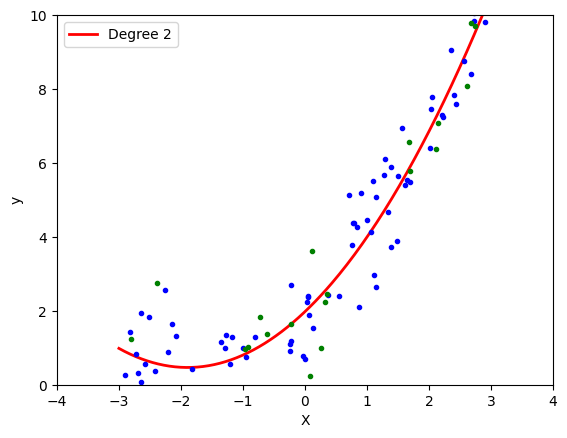

In [56]:
poly_regression(2)


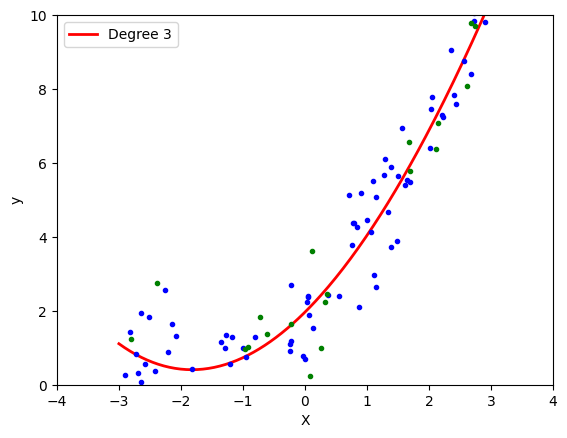

In [57]:
poly_regression(3)


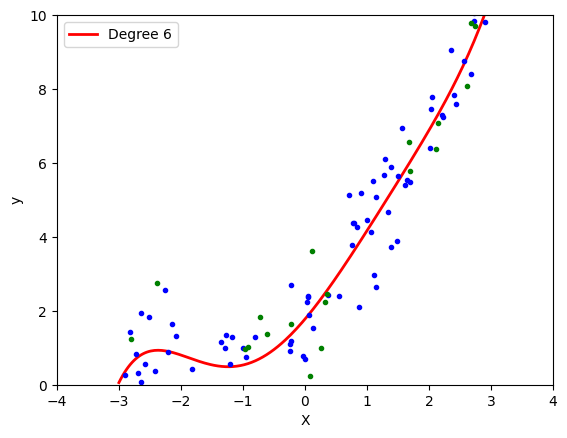

In [58]:
poly_regression(6)


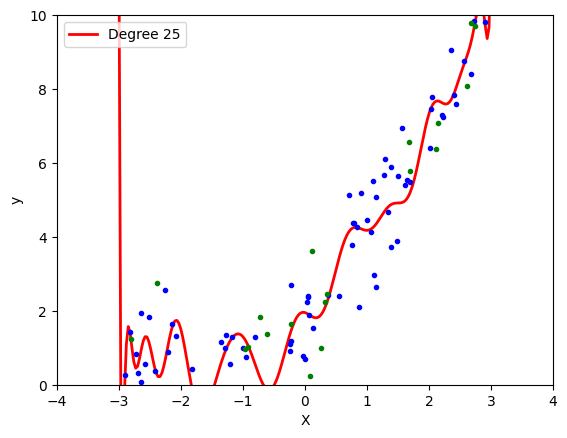

In [59]:
poly_regression(25)
